# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [80]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# to set a graph theme in seaborn
sns.set_theme(style="darkgrid",  palette="husl")

### Understanding the structure of the data

In [81]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
# read the data
data = pd.read_csv('/content/drive/MyDrive/Learning/PGPDSBA/Project-1/foodhub_order.csv')

# Take a copy of the data to work it forward.
df=data.copy()

In [83]:
# to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [84]:
# display the shape of the dataset
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns present in the dataset


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [85]:
# dataset info on columns and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are 5 numeric columns of ( 4 of type integer and 1 floatiing point) and 4 Object/String type columns present in the dataset

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [86]:
# Check for missing values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no missing values for any of the columns in the dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [87]:
# Display statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations:
The minimum value for food preparation time is 20 minutes

The average value for food preparation time is 27.37 minutes

The maximum value for food preparation time is 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]

In [88]:
# Value counts on rating column
df.rating.value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
There are 736 Orders that are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

*Lets do:*
*   Check if there are any duplicate rows in the data set
*   List down all columns and find the numerical and categorical variables
*   Explore the distributions for Numeric variables
*   Explore the distributions of Categorical Variables

In [89]:
# Check for duplicates
df.duplicated().sum()

0

In [90]:
# display column list
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are no duplicate rows in the entire data set

Order_id, customer_id, cost_of_the_order, food_preparation_time and delivery_time are the numerical variables.
Among this Order_id and customer_id are just the id type variables and doesn't tell as much the other numerical variables do.

### Order_id and Customer_id

In [91]:
# number of unique order ids
df.order_id.nunique()

1898

In [92]:
# number of unique customer ids
df.customer_id.nunique()

1200

In [93]:
# number of repeating customer ids
df['customer_id'].duplicated().sum()

698

#### Observations:

*The number of unique Order_id are the same as total row count; and thats obvious that Order_ids are unique*
*The are only 1200 unique customer_ids and that means there are returning customers-> 698 of them*

### Cost of the order

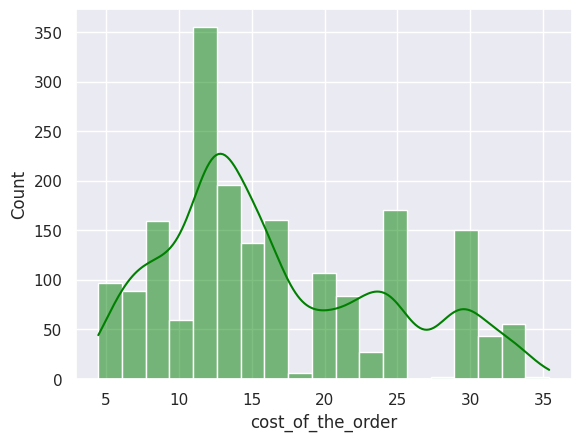

In [94]:
## Histogram for the cost of order
sns.histplot(data=df, x='cost_of_the_order',kde=True,color='green');

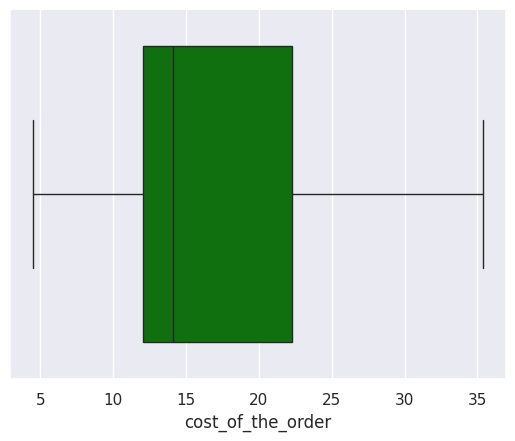

In [95]:
## Boxplot for the cost of order
sns.boxplot(data=df,x='cost_of_the_order',color='green');

#### Observations:

*   The cost of the order is a right skewed distribution
*   There are no outliers present for the distribution
*   75% of the orders cost less than 23 dollars and 50% of the orders cost less than 14 dollars





### Food Preparation time

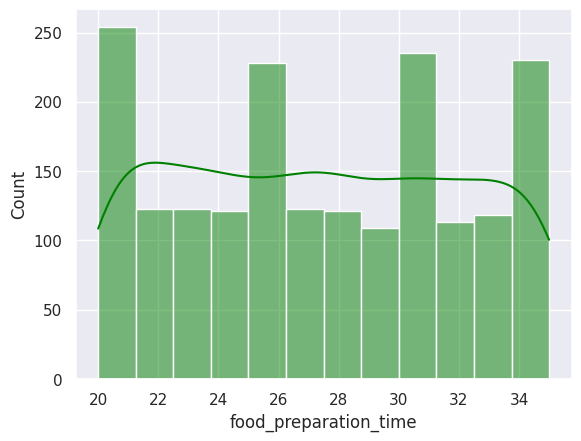

In [96]:
## Histogram for the food preparation time
sns.histplot(data=df, x='food_preparation_time',kde=True,color='green');

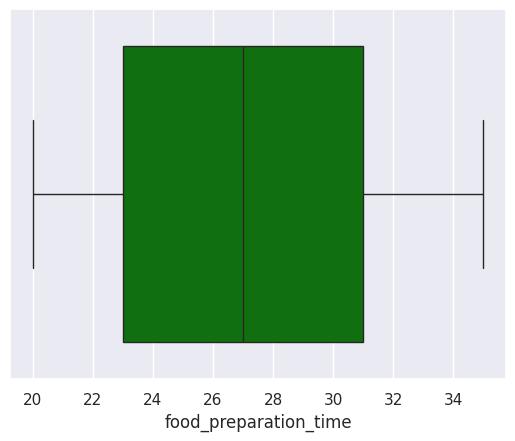

In [97]:
## Boxplot for the food preparation time
sns.boxplot(data=df,x='food_preparation_time',color='green');

#### Observations:

*   There are no skewness or outliers for the food preparation time distribution
*   The food preparation time varies between 20 to 35 minutes with a median and average time as 27 minutes



### Delivery time

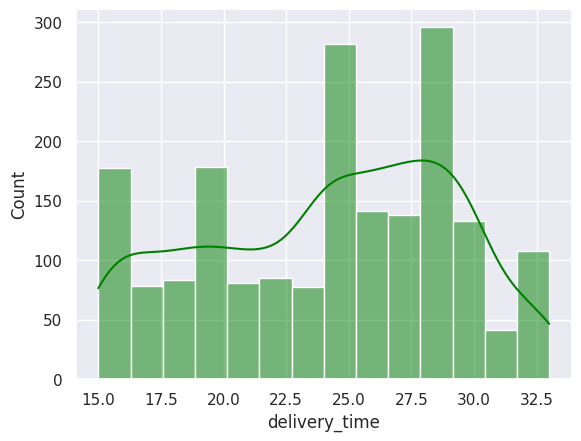

In [98]:
## Histogram for the delivery time
sns.histplot(data=df, x='delivery_time',kde=True,color='green');

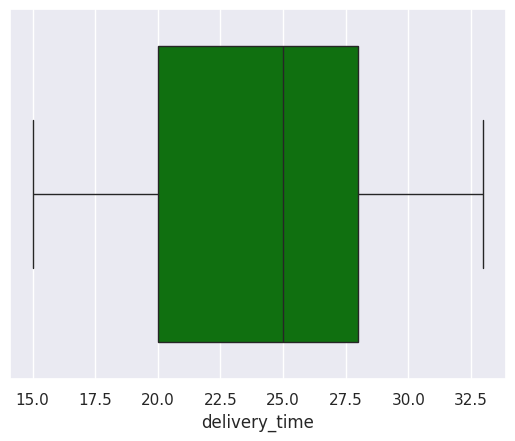

In [99]:
## Boxplot for the delivery time
sns.boxplot(data=df,x='delivery_time',color='green');

#### Observations:

*   The distribution is left skewed
*   For 75% of the orders the delivery time is less than 28 mins and for 50% of the orders the delivery time is less than 25 mins



### Restaurant name

In [100]:
## Number of Unique resturants
df.restaurant_name.nunique()

178

In [101]:
## Build a data frame with Top 10 restarurants in terms of order count
rest_df=df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).reset_index().head(10)
rest_df.rename(columns={'order_id':'order_count'},inplace=True)

In [102]:
rest_df

,restaurant_name,order_count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68
5,RedFarm Broadway,59
6,RedFarm Hudson,55
7,TAO,49
8,Han Dynasty,46
9,Blue Ribbon Sushi Bar & Grill,44


<Figure size 2000x600 with 0 Axes>

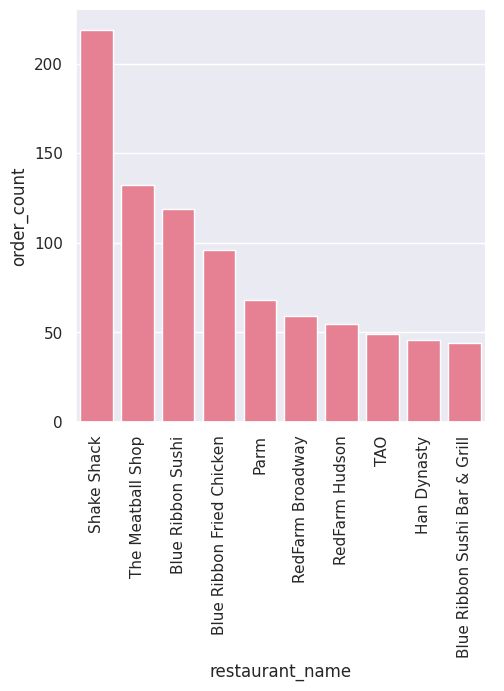

In [103]:
## Count plot for top 10 restaurants with order counts
plt.figure(figsize=(20,6));
sns.catplot(data=rest_df,x= 'restaurant_name', y='order_count', kind='bar');
plt.xticks(rotation=90);

#### Observations:

*   "Shake shack" is the restaurant with highest order count followed by "The Meatball shop" and "Blue Ribbon Sushi"




### Cuisine type

In [104]:
## Number of unique cuisine types
df.cuisine_type.value_counts()

,count
cuisine_type,
American,584
Japanese,470
Italian,298
Chinese,215
Mexican,77
Indian,73
Middle Eastern,49
Mediterranean,46
Thai,19


In [105]:
## Number of unique cuisine types in percentage
df.cuisine_type.value_counts(normalize=True)

,proportion
cuisine_type,
American,0.308
Japanese,0.248
Italian,0.157
Chinese,0.113
Mexican,0.041
Indian,0.038
Middle Eastern,0.026
Mediterranean,0.024
Thai,0.010


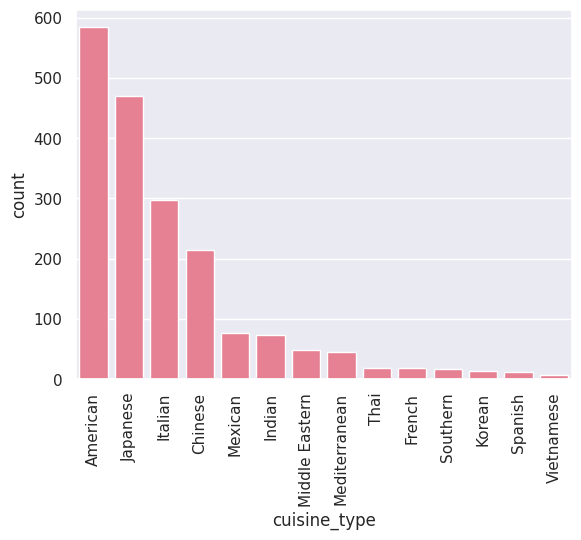

In [106]:
## Count plot for the cuisine types
sns.countplot(data=df, x='cuisine_type',order=df.cuisine_type.value_counts().index);
plt.xticks(rotation=90);

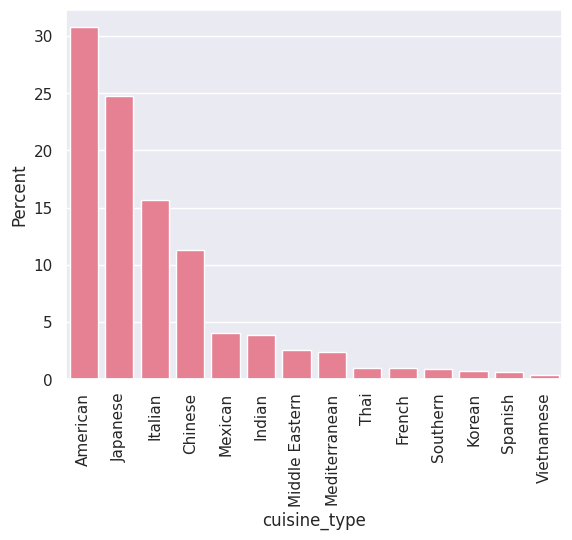

In [107]:
#barplot showing percentage of orders over different cuisine types
ax=sns.barplot(x='cuisine_type', y=df.cuisine_type.count(), data=df, estimator=lambda x: len(x) / len(df) * 100,order=df.cuisine_type.value_counts().index)
plt.xticks(rotation=90);
ax.set(ylabel="Percent");

#### Observations:

*   "American" cuisine has the highets number of orders followed by "Japanese" and "Italian"
*   "Vietnamese" has the lowest number of orders










### Day of the week

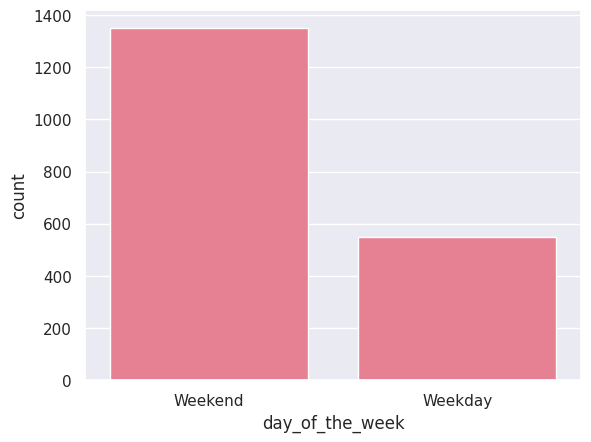

In [108]:
## Countplot for the day of the week
sns.countplot(data=df, x='day_of_the_week');

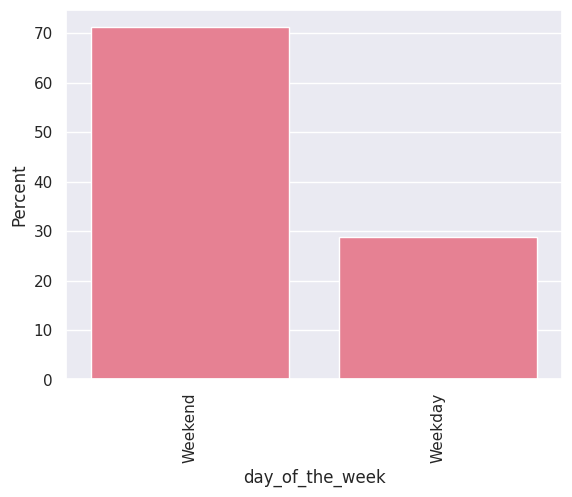

In [109]:
#barplot showing percentage of orders over day of the week
ax=sns.barplot(x='day_of_the_week', y=df.day_of_the_week.count(), data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.xticks(rotation=90);
ax.set(ylabel="Percent");

#### Observations:


*   Weekend has more orders(more than double in count) than the Weekdays




### Rating

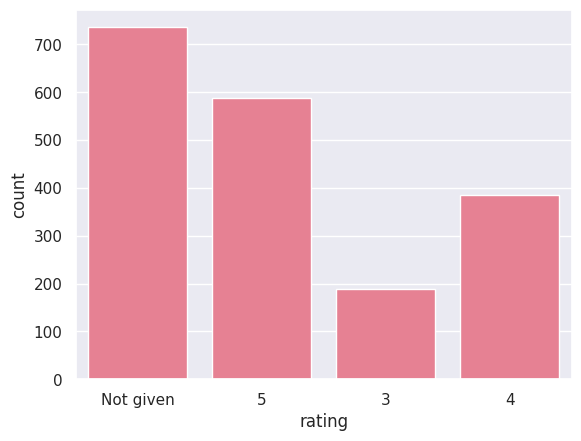

In [110]:
## Countplot for the rating
sns.countplot(data=df, x='rating');

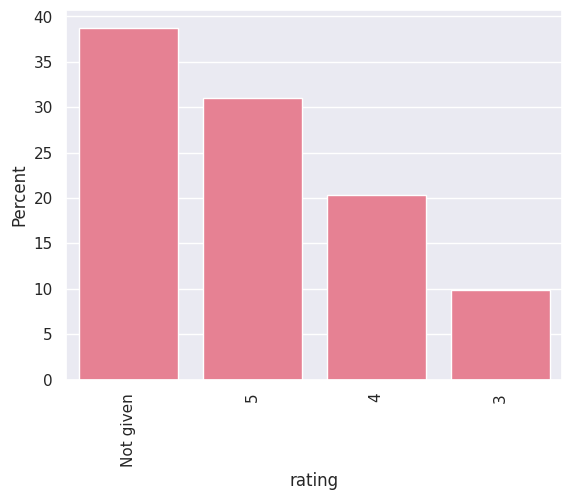

In [111]:
#barplot showing percentage of Ratings
ax=sns.barplot(x='rating', y=df.rating.count(), data=df, estimator=lambda x: len(x) / len(df) * 100,order = ['Not given','5','4','3'])
plt.xticks(rotation=90);
ax.set(ylabel="Percent");

#### Observations:


*   Around 40% of the orders are not rated by the customers
*   Among the rated orders - 5 is the rating received for highest number of orders followed by 4 and 3



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [112]:
# Group by restaurant names and get the count in descending order
df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
The top 5 restaurants in terms the number of orders are:

1) Shake Shack
2) The Meatball Shop
3) Blue Ribbon Sushi
4) Blue Ribbon Fried Chicken
5) Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [113]:
# Get the Cusines types with day of the week as weekend
df.cuisine_type[df.day_of_the_week=='Weekend'].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


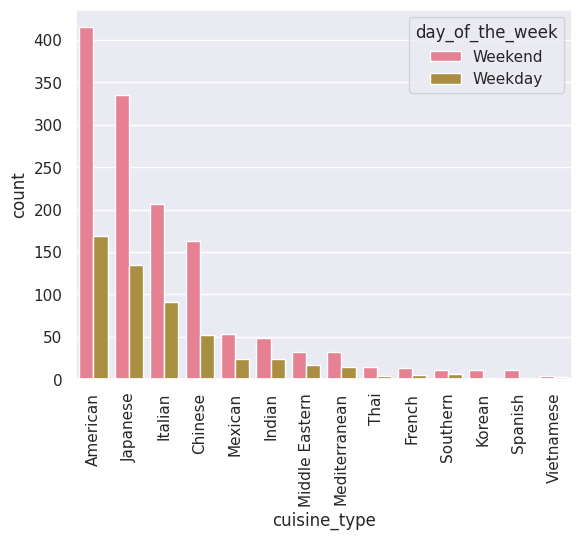

In [114]:
# count plot showing the count of orders with cusine type
sns.countplot(data=df, x='cuisine_type', order=df.cuisine_type.value_counts().index, hue='day_of_the_week');
plt.xticks(rotation=90);

#### Observations:

"American" is the most popular cuisine on weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [115]:
# Count of cost of order greater than 20 and finding the percentage
df.cost_of_the_order[df.cost_of_the_order>20].count()/df.cost_of_the_order.count()*100

29.24130663856691

#### Observations:

29.24% of the total orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [116]:
# Mean value of delivery time column
df.delivery_time.mean()

24.161749209694417

#### Observations:

The mean of order delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [117]:
# Group by customer ids and count them in descending order to find frequent
# customers
df.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3)

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:
52832, 47440 and 83287 are the customer ids of the top 3 most frequent customers and are eligible for discount vouchers


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


### Correlation between the numeric variables

In [118]:
# Build a numeric rating column for the correlation analysis
df['numeric_rating']=df.rating.apply(lambda x: 0 if x=='Not given' else int(x))

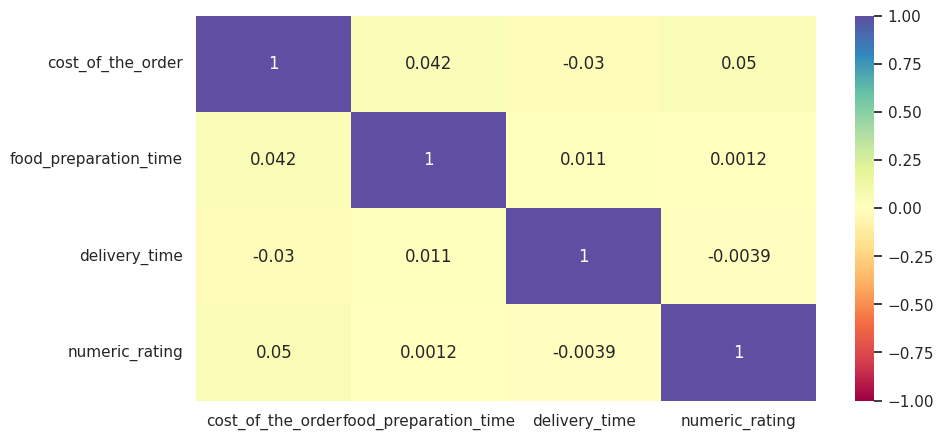

In [119]:
# Plot a heat map for correlations on numeric variables
plt.figure(figsize=(10,5))
#sns.heatmap(df.select_dtypes(exclude=[object]).corr(),annot=True);
sns.heatmap(df[['cost_of_the_order','food_preparation_time','delivery_time','numeric_rating']].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);
plt.show()

**Observations**:
There doesn't seem to be any notable correlation between any of the numeric variables in the dataset

#### Cusine type Vs Cost of the Order

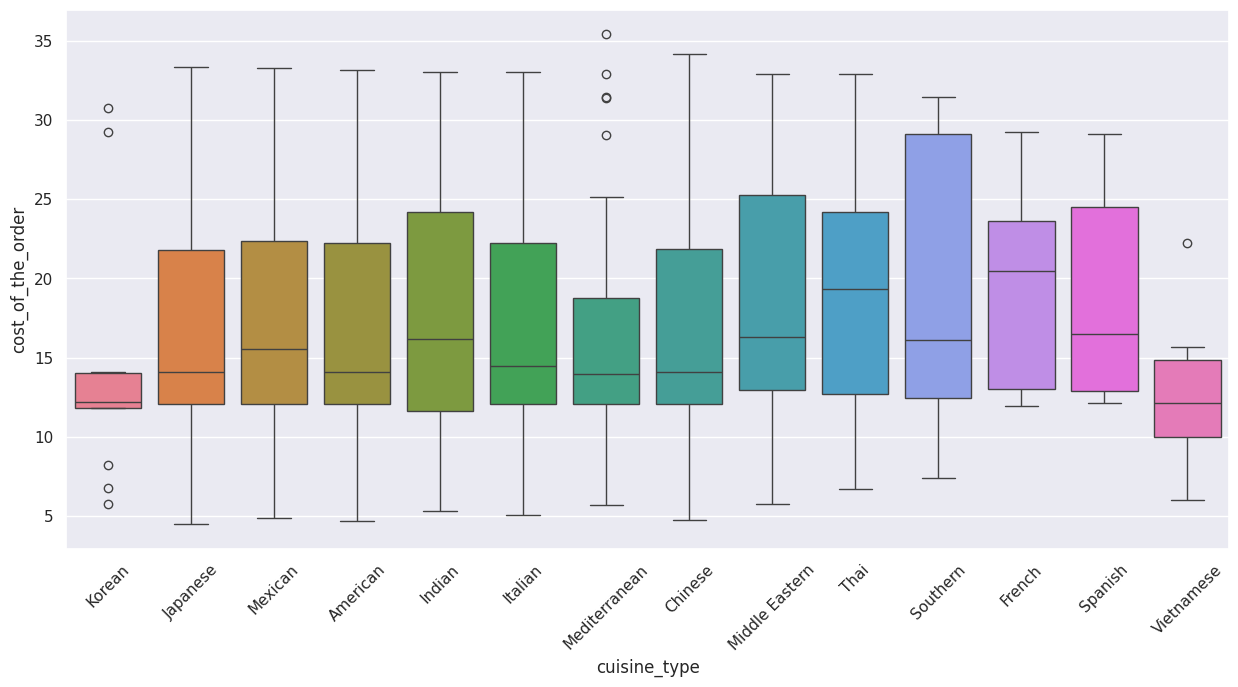

In [120]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data = df,x = "cuisine_type", y = "cost_of_the_order",hue='cuisine_type')
plt.xticks(rotation = 45)
plt.show()

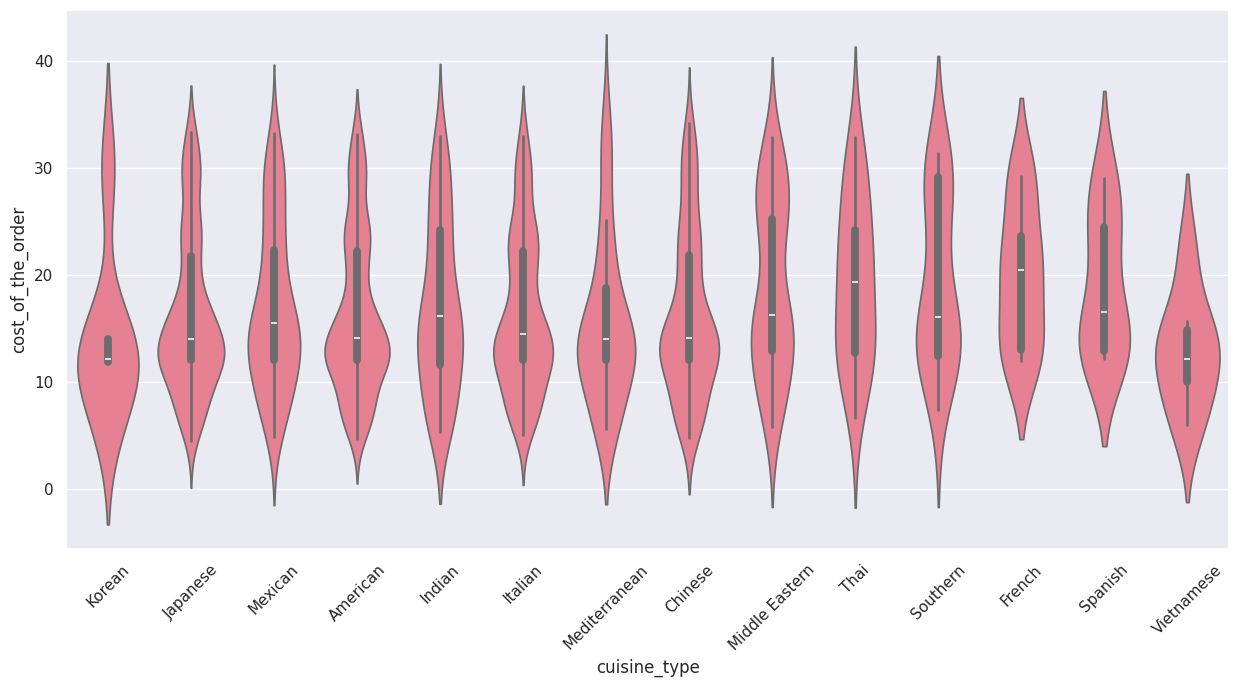

In [121]:
#Violinplot showing cost of the order over different cusines types
plt.figure(figsize=(15,7));
sns.violinplot(data = df, y = 'cost_of_the_order', x = 'cuisine_type');
plt.xticks(rotation=45);
plt.show();

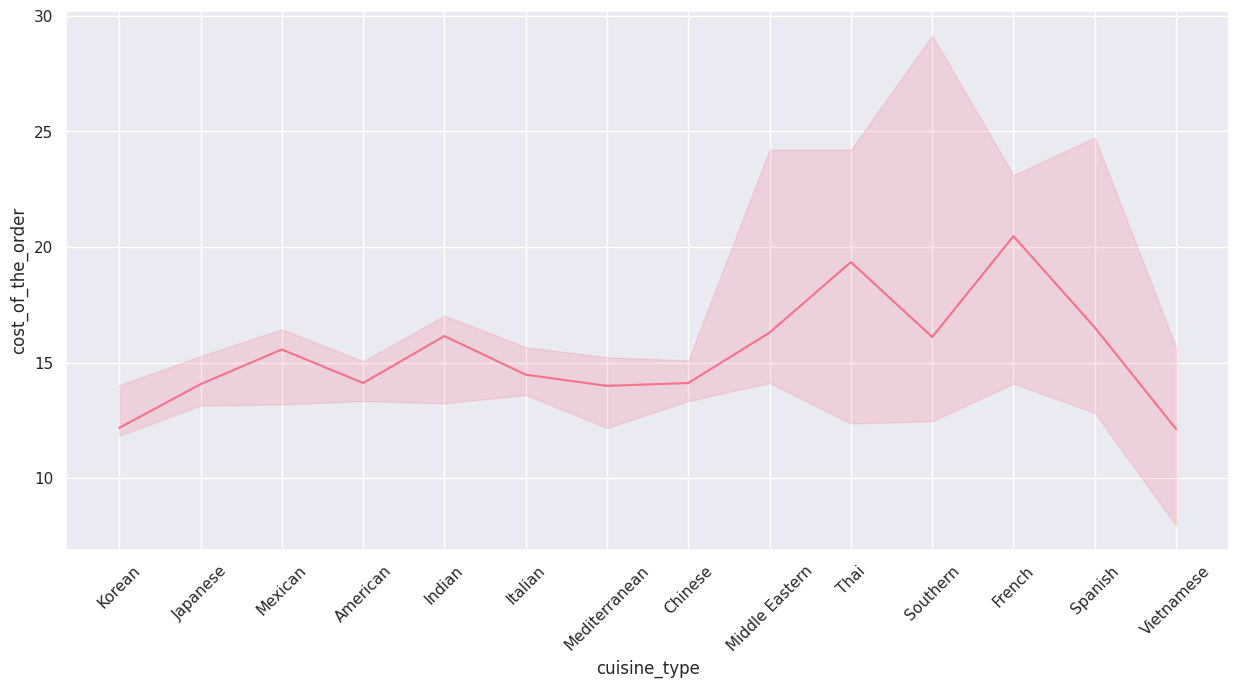

In [122]:
# a line plot showing the cost of order over different cuisines
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='cuisine_type', y='cost_of_the_order',estimator='median')
plt.xticks(rotation=45)
plt.show()

**Observations**:
*   French Cuisine has the highest median order cost followed by Thai
*   Korean, Mediterranean and Vietnamese has some outliers in distriution of cost of the orders




####Cuisine vs Food Preparation time

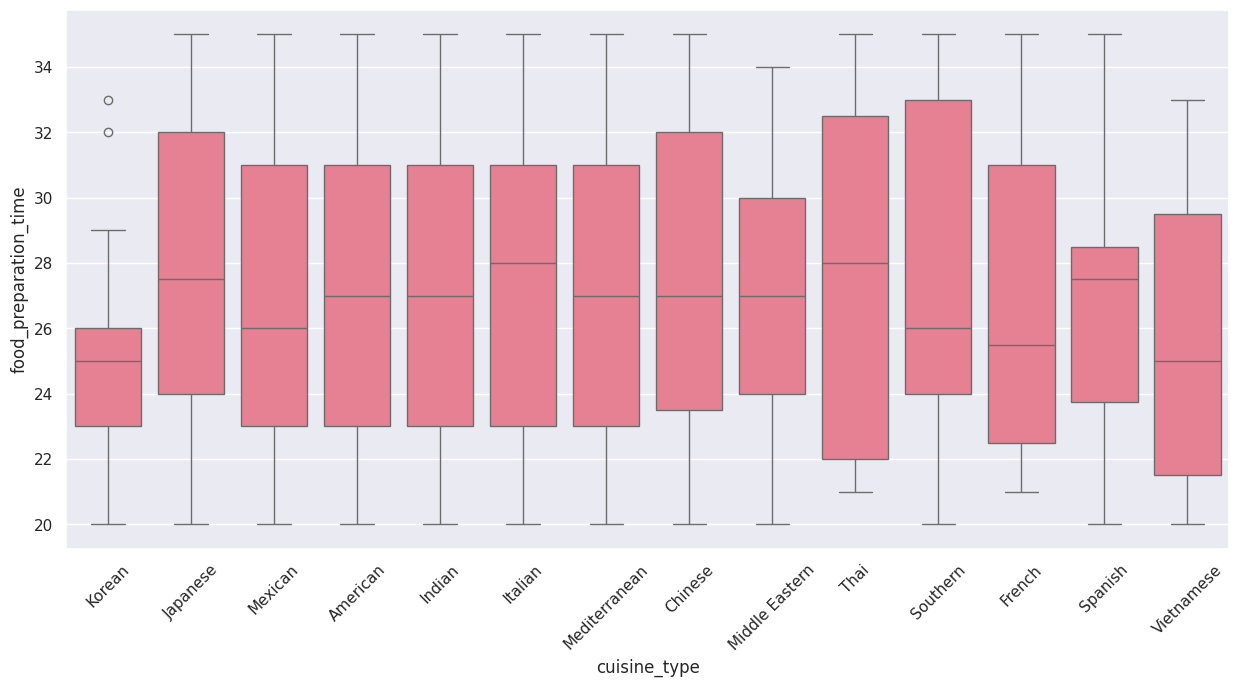

In [123]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data = df,x = "cuisine_type", y = "food_preparation_time")
plt.xticks(rotation = 45)
plt.show()

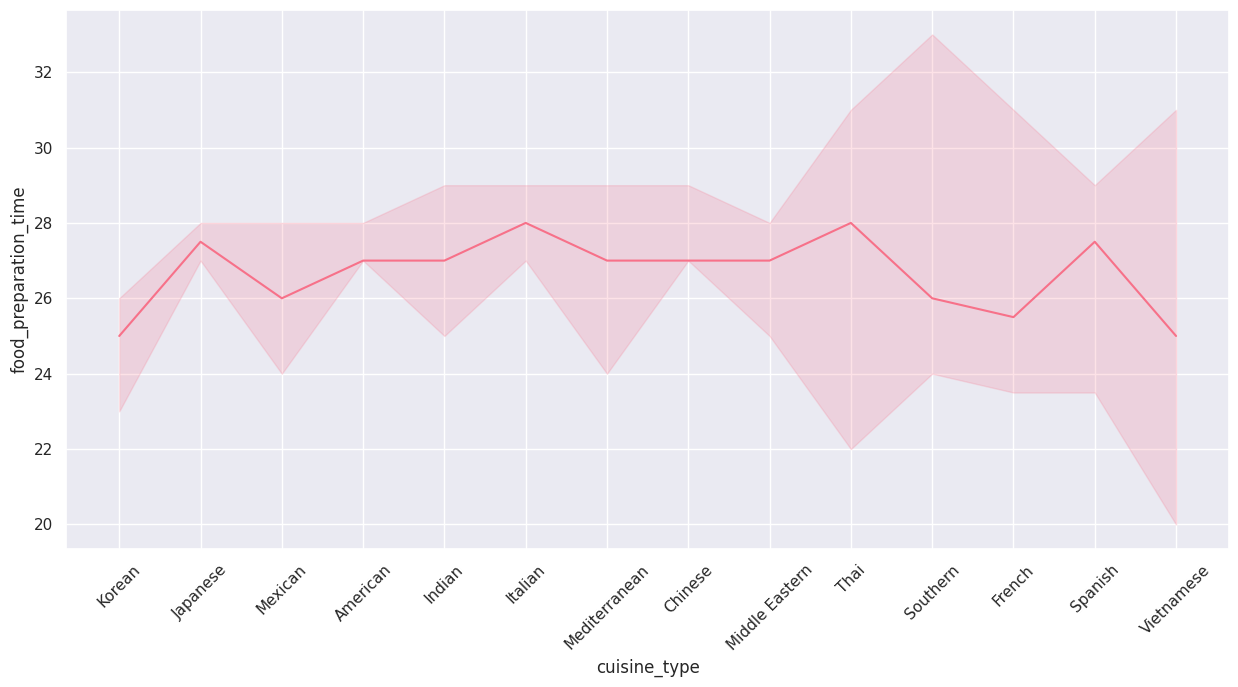

In [124]:
# a line plot showing the preparation time over different cuisines
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='cuisine_type', y='food_preparation_time',estimator='median')
plt.xticks(rotation=45)
plt.show()

**Observations**:
*   Korean and Vietnamese Cusine type has less median food preparation time
*   Italian and Thai followed has more median food preparation time.
*   However there is no drastic difference between the median food preparation time for different cuisines.




#### Day of the week Vs Preparation time

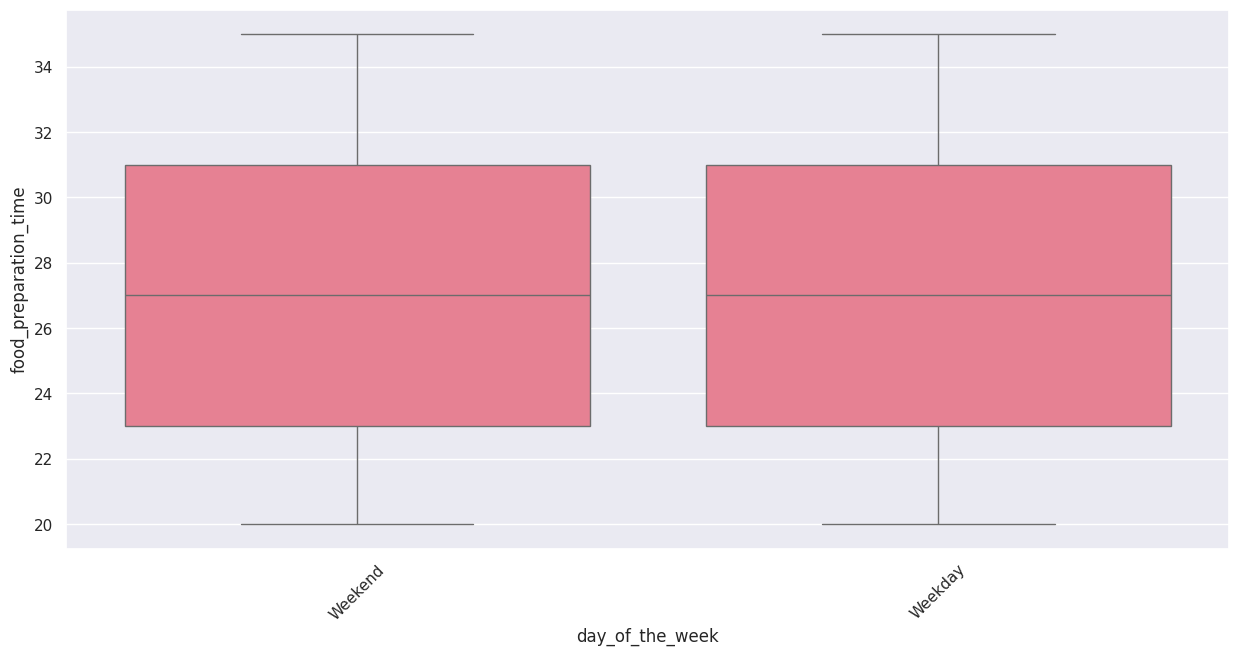

In [125]:
# Relationship between food preparation time and day of the week
plt.figure(figsize=(15,7))
sns.boxplot(data = df,x = "day_of_the_week", y = "food_preparation_time")
plt.xticks(rotation = 45)
plt.show()

**Observations**:
*   There doesn't seem to be any difference in food preparation time during weekends and weekdays. They are found to be taking the same time always.




#### Day of the week Vs Delivery time

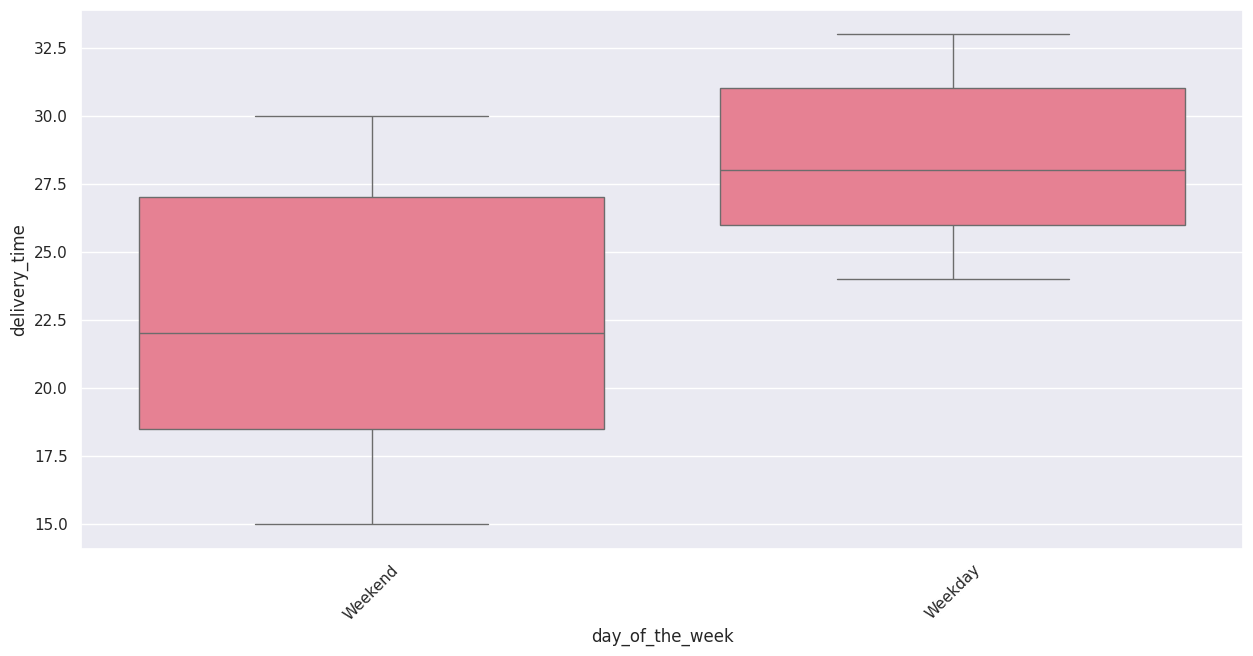

In [126]:
# Relationship between delivery time and day of the week
plt.figure(figsize=(15,7))
sns.boxplot(data = df,x = "day_of_the_week", y = "delivery_time")
plt.xticks(rotation = 45)
plt.show()

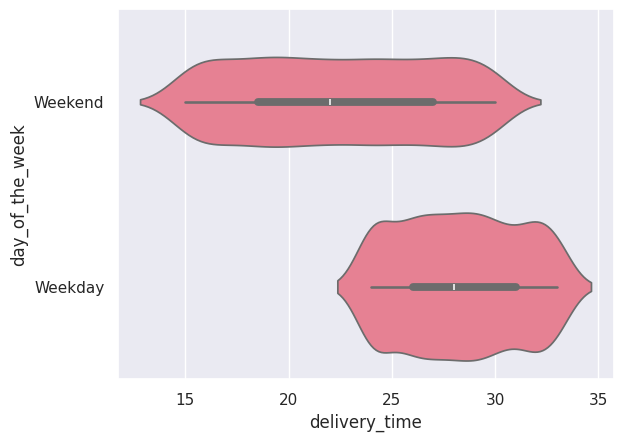

In [127]:
# violinplot to show delivery time over the day of week
sns.violinplot(data = df, y = 'day_of_the_week', x = 'delivery_time');

**Observations**:

*   There is a significant difference on delivery time between weekends and weekdays.The weekdays take longer to deliver than weekends.




#### Rating vs Cost of the order

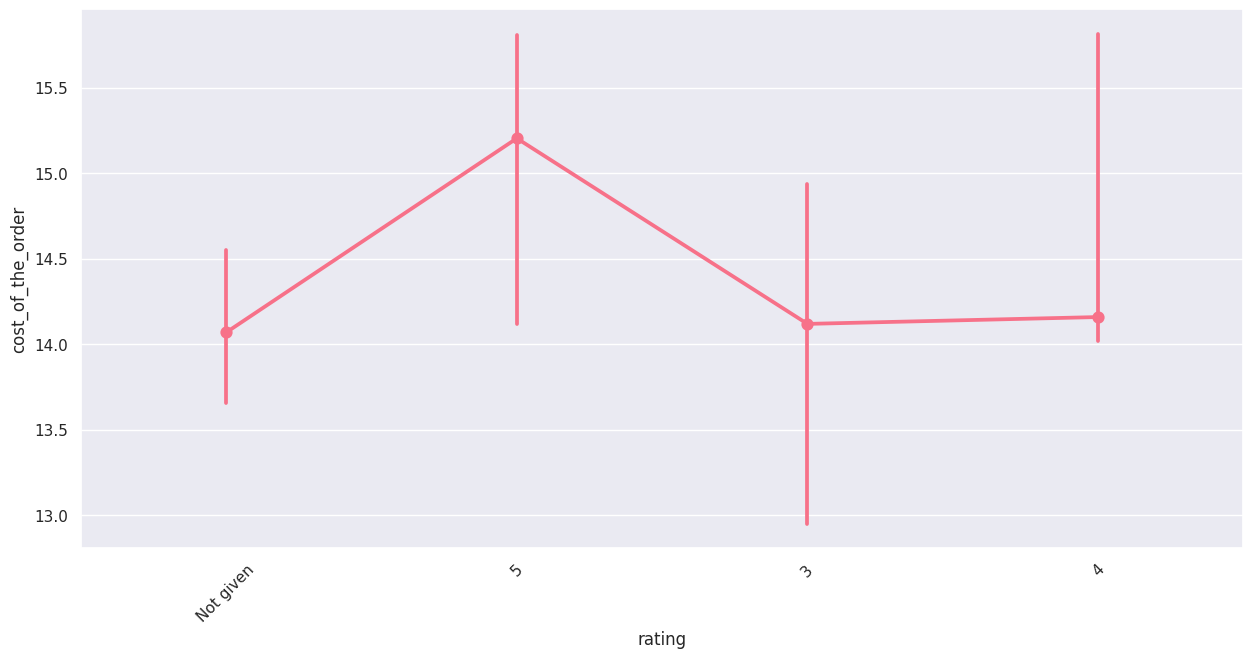

In [128]:
# Relationship between Rating and cost of the order
plt.figure(figsize=(15,7))
sns.pointplot(data = df,x = "rating", y = "cost_of_the_order",estimator='median')
plt.xticks(rotation = 45)
plt.show()

**Observations**:
*   The orders with highest mean value of rating found to have costed more than the orders with lower ratings




#### Rating vs Delivery time

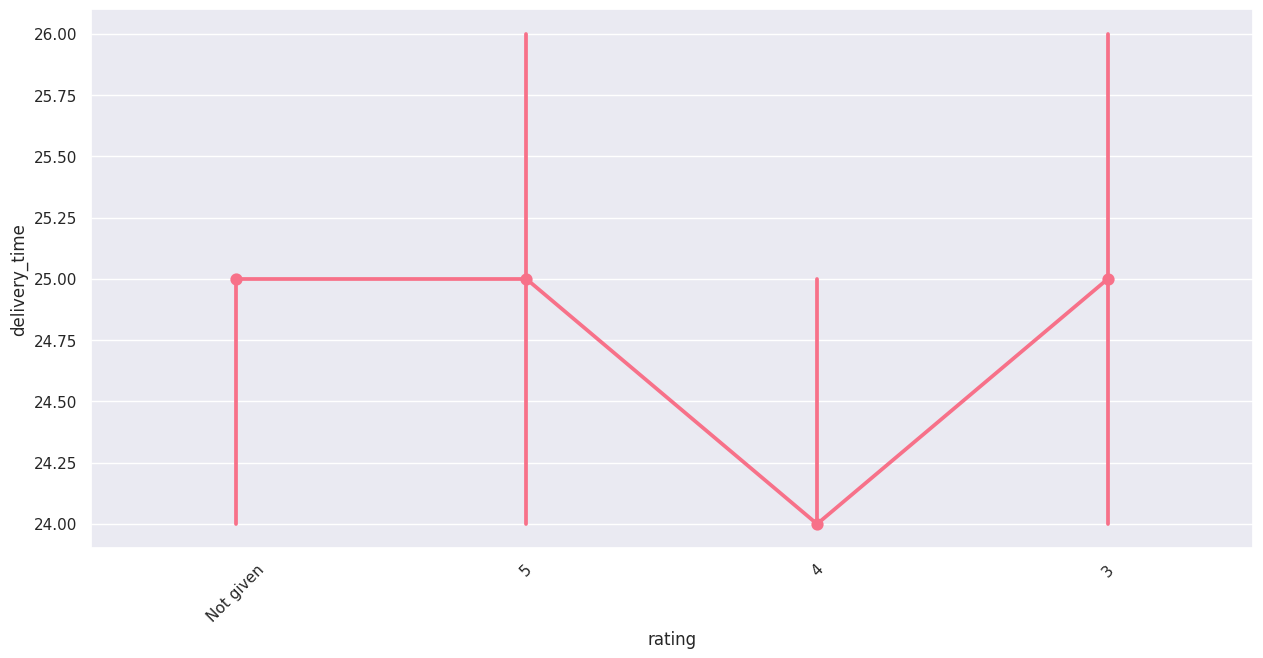

In [129]:
# Relationship between Rating and Delilvery time
plt.figure(figsize=(15,7))
sns.pointplot(data = df,x = "rating", y = "delivery_time",order = ['Not given','5','4','3'],estimator='median')
plt.xticks(rotation = 45)
plt.show()

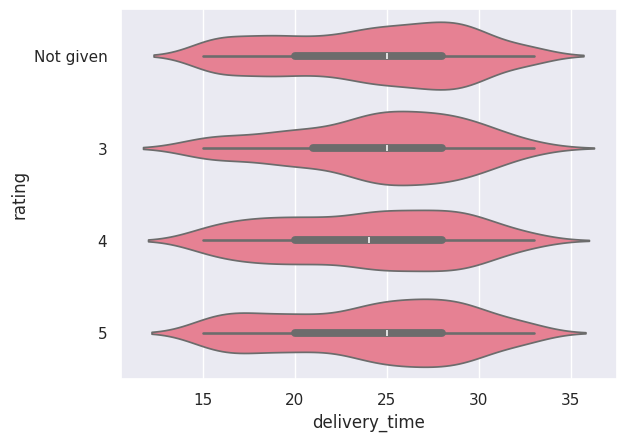

In [130]:
#Violinplot showing rating over delivery time
sns.violinplot(data = df, y = 'rating', x = 'delivery_time', order = ['Not given','3','4','5']);

**Observations**:
*   There doesn't seem to be a clear distinction/impact for delivery time for rating of orders as their median values are at just 1 min difference
This indicates the customer ratings are not impacted by delivery time




#### Rating vs Food preparation time

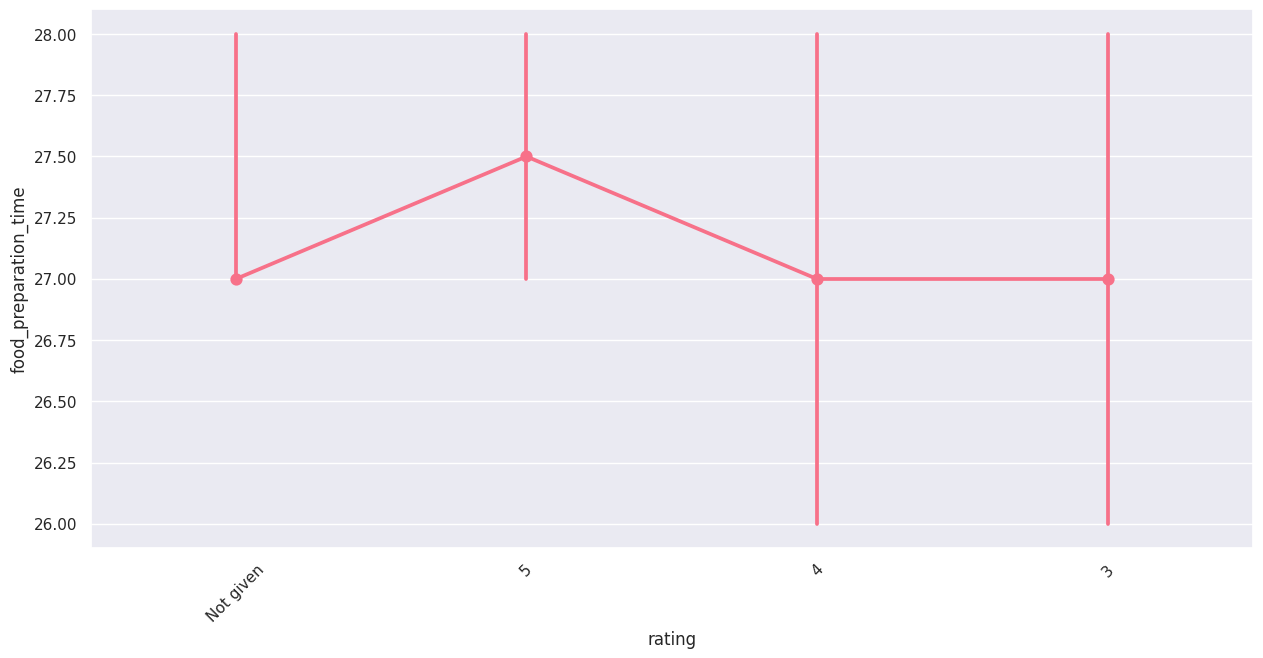

In [131]:
# Relationship between Rating and Food Preparation time
plt.figure(figsize=(15,7))
sns.pointplot(data = df,x = "rating", y = "food_preparation_time",order = ['Not given','5','4','3'],estimator='median')
plt.xticks(rotation = 45)
plt.show()

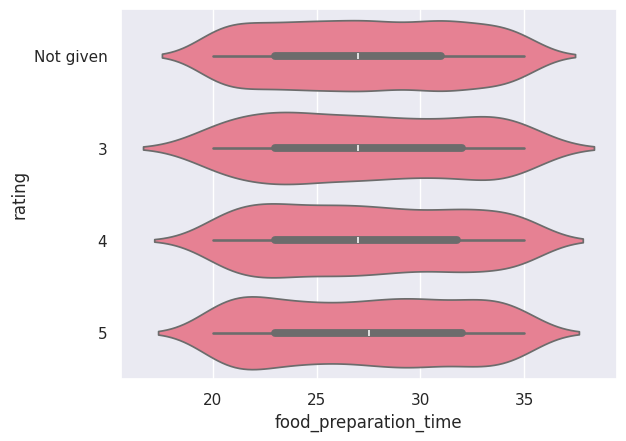

In [132]:
#Violinplot showing rating over preparation time
sns.violinplot(data = df, y = 'rating', x = 'food_preparation_time', order = ['Not given','3','4','5']);

**Observations**:
*   There doesn't seem to be a clear distinction/impact for food preparation time for rating of orders as their median values are at just less than 1 min difference. ie, the customer ratings are not affacted by food prepartion time

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [133]:
# Filter out orders with rating not given
# Cast the rating column to integer for other ratings
# Group by restaurant name and find aggregate of rating column for count and
# average. Filter the above for count > 50 and average > 4
df_rating= df.query('rating!= "Not given"').copy().astype({'rating':'int'})
df_rating.groupby('restaurant_name')['rating'].agg(['count','mean']).query('count>50 and mean>4')

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328
Blue Ribbon Sushi,73,4.219
Shake Shack,133,4.278
The Meatball Shop,84,4.512


#### Observations:
The restaurants that are eligible to get the promotional offers are *Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop*

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [135]:
# Add a revenue column for computation of revenue
# Apply a function with given criteria to the cost of the order column to find the revenue for each orders
# get the sum of the revenue column
df.Revenue=df.cost_of_the_order.apply(lambda x: x*0.25 if x>20 else (x*0.15 if x>5 else 0))
df.Revenue.sum().round(2)


6166.3

#### Observations:
*The net revenue genrated the company across all orders = $6166.30.*


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [136]:
# Add a new column for total time
# Filter for total time > 60, count them and get the percentage
df['total_time']= df.food_preparation_time + df.delivery_time
df.total_time[df.total_time>60].count()/df.total_time.count()*100


10.537407797681771

#### Observations:
*10.54% of the total orders take more than 60 minutes to deliver*


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [137]:
# Group by the day of the week for delivery time and get the mean
df.groupby('day_of_the_week')['delivery_time'].mean()


,delivery_time
day_of_the_week,
Weekday,28.340
Weekend,22.470


#### Observations:
*On Weekdays the mean delivery time is 28.34 minutes*

*On Weeends the mean delivery time is 22.47 minutes*  

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

*   **"American"** is the most popular cuisine on both weekdays and weekends followed by **"Japanese" and "Italian"**.
*   The most popular cusines types remain the same over the weekdays and weekends. *That is, the customer preference is not changed during weekdays vs weekends*
*   Around 70% of the total orders belong to *American, Japanese and Italian* cuisine.
*   The **number of orders are much higher over the weekends than weekdays**. Infact, more than 70% of the orders are placed over the weekend
*   75% of the orders cost less than 23 dollars and 50% of the orders placed between 5 dollars and 14 dollars
*   The food preparation time varies between 20 to 35 minutes and stays consistent across weekdays and weekends
*   There is a significant difference on delivery time between weekends and weekdays.*The Weekend delivery is faster than weekdays*.
*   Around *40% of the orders are not rated by the customers*
*   All ratings are 3 or higher  - 5 is the rating received for highest number of orders followed by 4 and 3.
*   There is no relation for Order rating with any of the other factors including delivery time of preparation time








### Recommendations:

*  The popular cuisine types are showing a trend with American, Japanese and Italian cuisines contributing to 70% of the orders. This could be be used in improving the business. Some possible ways are
  * *Work with more restaurants offering these type of popular cuisines*.
  * *Work with existing restaurants to increase their food choices/menu for these type of cuisines*
*  The orders over weekends are much higher and generating more sales. Make use of this *prioritizing orders over weekend and attract customers with more offers like express delivery, coupons etc*.
*  Provide adequate staff/drivers to cater the weekend load of orders to stay consistent/faster in terms of delivery times.
*  Most of the orders costs less than 20 dollars. So *work with restaurants that has item pricing less than 20 dollars or have them introduce more items that costs on the lower price side*
*  The measure of customer satisfaction should be one of the key driving factors for improvement of business model. Here around 40 percent  of the orders are not rated which doesn't give a clear picture on customer ratings. So the customer should be encouraged to provide ratings/feedback. A possible way to get more feedbacks is
  * *To conduct satisfaction surveys and provide rewards/reedemable points to customers who participate.*

---